**Cognorise_infotech_Project_Task1**

**SHAHAMA V P**

# **SPAM EMAIL DETECTION**

**A MACHINE LEARNING PROJECT FOR DETECTION OF SPAM EMAILS**

In [ ]:
# importing sufficient python libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from nltk.stem import SnowballStemmer
from nltk import TweetTokenizer
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
# importing the dataset
df=pd.read_csv("/content/drive/MyDrive/Cognorise Infotech/spam.csv",encoding='ISO-8859-1')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# to print the dimension of the dataframe in (rows and columns) format
df.shape

(5572, 2)

In [ ]:
# to print column names of dataframe
df.columns

Index(['Category', 'Message'], dtype='object')

In [ ]:
# to print the datatype of each column
df.dtypes

Category    object
Message     object
dtype: object

In [ ]:
# to check whether there is any missing values in the dataframe
df.isna().sum()

Category    0
Message     0
dtype: int64

In [ ]:
# to get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# checking the distribution of the target variable
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

Text(0, 0.5, 'Count')

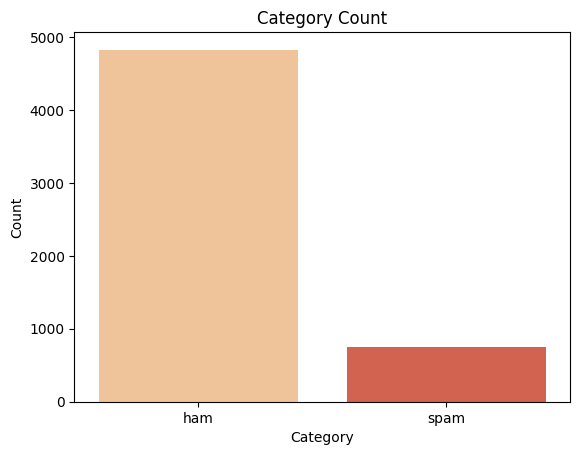

In [ ]:
sns.countplot(x='Category',data=df,hue='Category',palette='OrRd')
plt.title('Category Count')
plt.xlabel('Category')
plt.ylabel('Count')

# **Converting the text data to numerical values**

In [ ]:
# # Label Encoding is a technique used to convert categorical variables to numerical values
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ã¼ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# **NATURAL LANGUAGE PROCESSING STEPS**

In [ ]:
df

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ã¼ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [ ]:
# assigning the column 'Message' to a variable tweets
tweets=df.Message
tweets

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ã¼ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
# to remove special characters
tweets=tweets.str.replace('[^a-zA-Z0-9]+','')
tweets

<ipython-input-32-a72f1cf34257>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace('[^a-zA-Z0-9]+','')


0       GountiljurongpointcrazyAvailableonlyinbugisngr...
1                                      OklarJokingwifuoni
2       Freeentryin2awklycomptowinFACupfinaltkts21stMa...
3                       UdunsaysoearlyhorUcalreadythensay
4         NahIdontthinkhegoestousfhelivesaroundherethough
                              ...                        
5567    Thisisthe2ndtimewehavetried2contactuUhavewonth...
5568                          Willbgoingtoesplanadefrhome
5569            PitywasinmoodforthatSoanyothersuggestions
5570    TheguydidsomebitchingbutIactedlikeidbeinterest...
5571                                 RoflItstruetoitsname
Name: Message, Length: 5572, dtype: object

In [ ]:
# Tokenization: Each sentence is converted into word-by-word data
# here we need the data as word data separated by space
# stemming : to find the root word
stemmer=SnowballStemmer('english')
tk=TweetTokenizer()

In [ ]:
tweets=tweets.apply(lambda x:[stemmer.stem(token.lower()) for token in tk.tokenize(x)]).apply(lambda token:' '.join(token))
tweets

0       gountiljurongpointcrazyavailableonlyinbugisngr...
1                                      oklarjokingwifuoni
2       freeentryin 2awklycomptowinfacupfinaltkts21stm...
3                       udunsaysoearlyhorucalreadythensay
4         nahidontthinkhegoestousfhelivesaroundherethough
                              ...                        
5567    thisisth 2ndtimewehavetried2contactuuhavewonth...
5568                           willbgoingtoesplanadefrhom
5569                pitywasinmoodforthatsoanyothersuggest
5570    theguydidsomebitchingbutiactedlikeidbeinterest...
5571                                  roflitstruetoitsnam
Name: Message, Length: 5572, dtype: object

In [ ]:
# importing essential natural language tookit (NLTK) libraries
nltk.download('stopwords')
sw=stopwords.words('english')
sw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# remove stopword
tweets=tweets.apply(lambda x:[token for token in tk.tokenize(x) if token not in sw]).apply(lambda token:' '.join(token))
tweets

0       gountiljurongpointcrazyavailableonlyinbugisngr...
1                                      oklarjokingwifuoni
2       freeentryin 2awklycomptowinfacupfinaltkts21stm...
3                       udunsaysoearlyhorucalreadythensay
4         nahidontthinkhegoestousfhelivesaroundherethough
                              ...                        
5567    thisisth 2ndtimewehavetried2contactuuhavewonth...
5568                           willbgoingtoesplanadefrhom
5569                pitywasinmoodforthatsoanyothersuggest
5570    theguydidsomebitchingbutiactedlikeidbeinterest...
5571                                  roflitstruetoitsnam
Name: Message, Length: 5572, dtype: object

In [ ]:
# vectorization: converting to numerical
vectorizer=TfidfVectorizer()
X=vectorizer.fit_transform(tweets)
print(X)

  (0, 2354)	1.0
  (1, 4412)	1.0
  (2, 404)	0.7285935995208821
  (2, 2171)	0.6849462509841224
  (3, 5385)	1.0
  (4, 4022)	1.0
  (5, 771)	0.7071067811865476
  (5, 2186)	0.7071067811865476
  (6, 2105)	1.0
  (7, 1270)	0.6890501265882345
  (7, 1546)	0.7247136834976542
  (8, 1246)	0.7071067811865476
  (8, 5833)	0.7071067811865476
  (9, 157)	0.7430596950893483
  (9, 2401)	0.6692251411399044
  (10, 3237)	1.0
  (11, 125)	0.7071067811865476
  (11, 4826)	0.7071067811865476
  (12, 298)	0.7071067811865476
  (12, 5454)	0.7071067811865476
  (13, 3503)	1.0
  (14, 3104)	1.0
  (15, 5872)	1.0
  (16, 4285)	1.0
  (17, 641)	0.7071067811865476
  :	:
  (5553, 2418)	1.0
  (5554, 5622)	1.0
  (5555, 810)	0.7071067811865476
  (5555, 5963)	0.7071067811865476
  (5556, 5987)	1.0
  (5557, 981)	0.7071067811865476
  (5557, 4108)	0.7071067811865476
  (5558, 4906)	1.0
  (5559, 3068)	1.0
  (5560, 1472)	1.0
  (5561, 2255)	1.0
  (5562, 681)	0.7071067811865476
  (5562, 4424)	0.7071067811865476
  (5563, 1087)	0.75182726630665

In [ ]:
type(X)

scipy.sparse._csr.csr_matrix

# **SEPARATING X AND Y**

In [ ]:
X=X.toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
vectorizer.get_feature_names_out()

array(['0089mylastfourdigitsareselectedtoreceiveda350awardifyournumbermatchespleasecall09063442151toclaimyour350award',
       '00pleasecall08712404000immediatelyasthereisanurgentmessagewaitingforyou',
       '01256987', ..., 'ywantogotherecdoctor',
       'ywhereuatdogbreathitsjustsoundinglikejancthats', 'zoeitjusthitm'],
      dtype=object)

In [ ]:
y=df['Category'].values
y

array([0, 0, 1, ..., 0, 0, 0])

# **SPLITING TO TRAINING AND TESTING DATA**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

# **MODEL CREATION AND PERFORMANCE EVALUATION**

In [ ]:
lr=LogisticRegression()
rf=RandomForestClassifier(random_state=1)
ab=AdaBoostClassifier(random_state=1)
knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Make predictions on the test data
models=[lr,rf,ab,knn]
for model in models:
  print("****************************",model,"*************************************")
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(classification_report(y_test,y_pred))

**************************** LogisticRegression() *************************************
              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1442
           1       1.00      0.00      0.01       230

    accuracy                           0.86      1672
   macro avg       0.93      0.50      0.47      1672
weighted avg       0.88      0.86      0.80      1672

**************************** RandomForestClassifier(random_state=1) *************************************
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1442
           1       1.00      0.35      0.52       230

    accuracy                           0.91      1672
   macro avg       0.95      0.68      0.74      1672
weighted avg       0.92      0.91      0.89      1672

**************************** AdaBoostClassifier(random_state=1) *************************************
              precision    recall  f1-score   supp

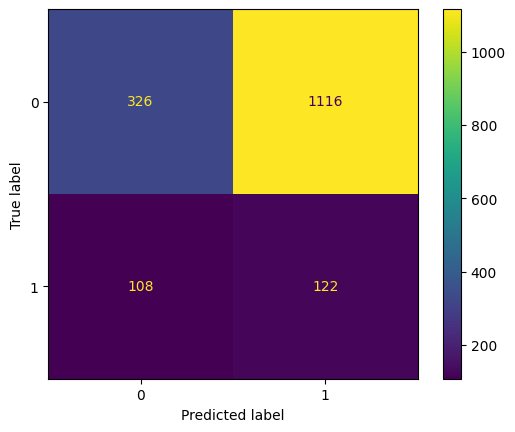

In [ ]:
# confusion matrix display
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

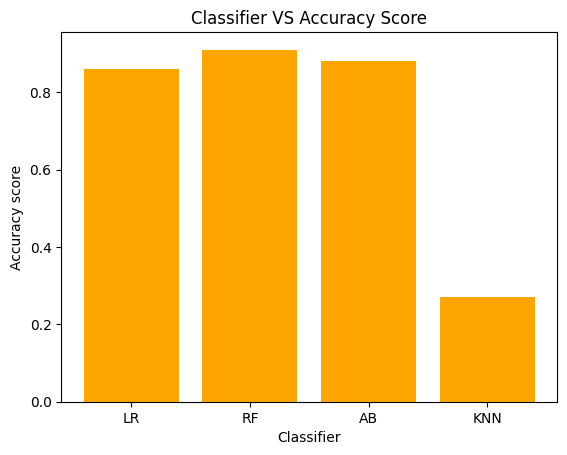

In [ ]:
x=['LR','RF','AB','KNN']
y=[0.86,0.91,0.88,0.27]
plt.bar(x,y,color='orange')
plt.xlabel('Classifier')
plt.ylabel('Accuracy score')
plt.title('Classifier VS Accuracy Score')
plt.show()

**from above evaluation random forest classifier have best accuray score while  have KNN worst accuracy**

In [ ]:
y_new=rf.predict(vectorizer.transform(['pity, * was in mood for that. So...any other suggest']))
y_new

array([0])